# 알아야할 것
    - 미분
    - 그래디언트 벡터
    - 경사하강법

## 미분이 뭔가요? (미분을 이용한 경사하강법 순한맛)
    - 변수의 움직임에 따른 함수값의 변화를 측정하기 위한 도구
    - 변화율의 극한

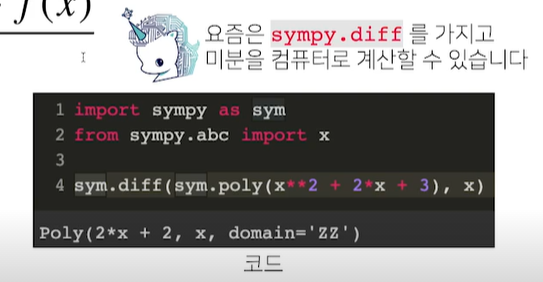

In [4]:
import sympy as sym
from sympy.abc import x

sym.diff(sym.poly(x**2 + 2*x + 3), x)

Poly(2*x + 2, x, domain='ZZ')

- 미분 그림으로 이해하기
    - 미분의 이용?? : 어느방향으로 움직여야 함수값이 증가하는지 감소하는지 알 수 있음
    - 함수를 증가시키고 싶으면?
        - 미분값을 더해주면 됨
    - 함수를 감소시키고 싶으면?
        - 미분값을 빼주면 됨

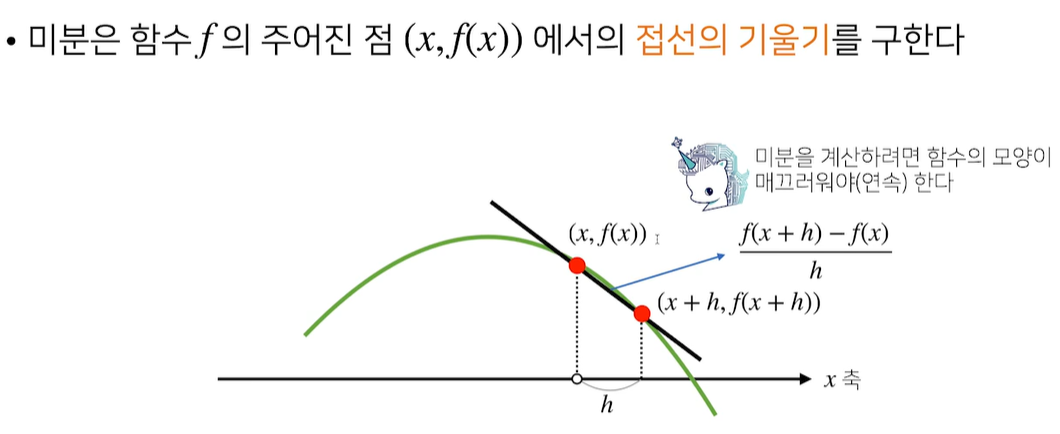

- 경사상승법?
    - 미분값을 더해서 함수값의 극대값을 찾음
- 경사하강법?
    - 미분값을 빼서 함수의 극소값을 찾음

## - 경사하강법 알고리즘?? 

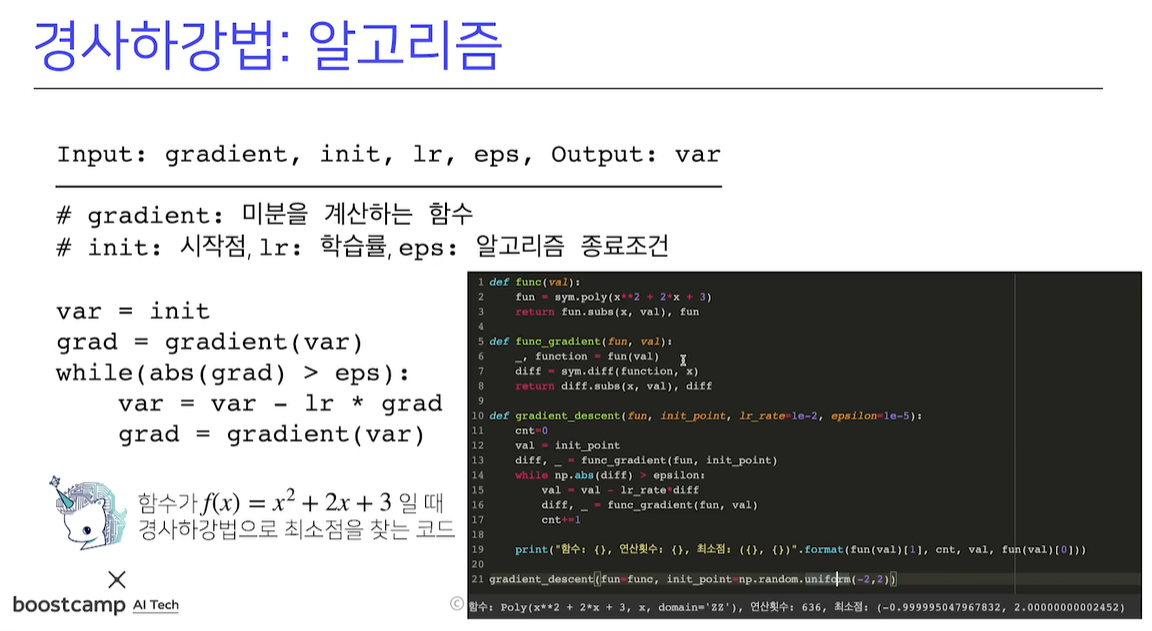

In [61]:
import sympy as sym
from sympy.abc import x
import numpy as np

def func(val):
    fun = sym.poly(x**2 + 4*x + 5)
    return fun.subs(x,val), fun  # sub는 x에 val를 대입하여 나온 결과를 보여주는듯

def func_gradient(fun, val):
    _, function = fun(val)
    diff = sym.diff(function, x)  #sym.dff 는 미분을 해줌 즉 diff변수에 미분식을 넣어준것
    return diff.subs(x, val), diff

def gradient_descent(fun, init_point, lr_rate=1e-2, epsilon=1e-5):
    cnt=0
    val = init_point
    diff, _ = func_gradient(fun, init_point)
    while np.abs(diff) > epsilon:
        val = val - lr_rate*diff
        diff, _ = func_gradient(fun, val)
        cnt += 1
        if cnt%50 == 0 :
            print(f"함수: {fun(val)[1]}, 연산횟수: {cnt}, 최소점: ({val}, {fun(val)[0]})")
    print(f"함수: {fun(val)[1]}, 연산횟수: {cnt}, 최소점: ({val}, {fun(val)[0]})")
        
gradient_descent(fun=func, init_point=np.random.uniform(100,200))   # np.random.uniform을 최대,최소 사이 균등분할 숫자하나 뽑아줌

함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 50, 최소점: (69.9530678035353, 5178.24396634014)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 100, 최소점: (24.2031256833001, 687.603795574820)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 150, 최소점: (7.54238389736991, 92.0570904447845)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 200, 최소점: (1.47504689117366, 13.0759508958557)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 250, 최소점: (-0.734493285353559, 2.60150724481523)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 300, 최소점: (-1.53914082457911, 1.21239117956963)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 350, 최소점: (-1.83216906152176, 1.02816722391049)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 400, 최소점: (-1.93888106082566, 1.00373552472580)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 450, 최소점: (-1.97774233547362, 1.00049540363017)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산횟수: 500, 최소점: (-1.99189443342994, 1.00006570020942)
함수: Poly(x**2 + 4*x + 5, x, domain='ZZ'), 연산

- 변수가 벡터이면???
    - 편미분을 사용해야함 (특정 좌표축으로 이동하는 미분)
    - ei는 i 번째 값만 영향을 주고 나머지는 영향을 안주게 하는 것

In [35]:
## 편미분 하기
from sympy.abc import x,y

sym.diff(sym.poly(x**2 + 2*x*y + 3) + sym.cos(x + 2*y), x)

2*x + 2*y - sin(x + 2*y)

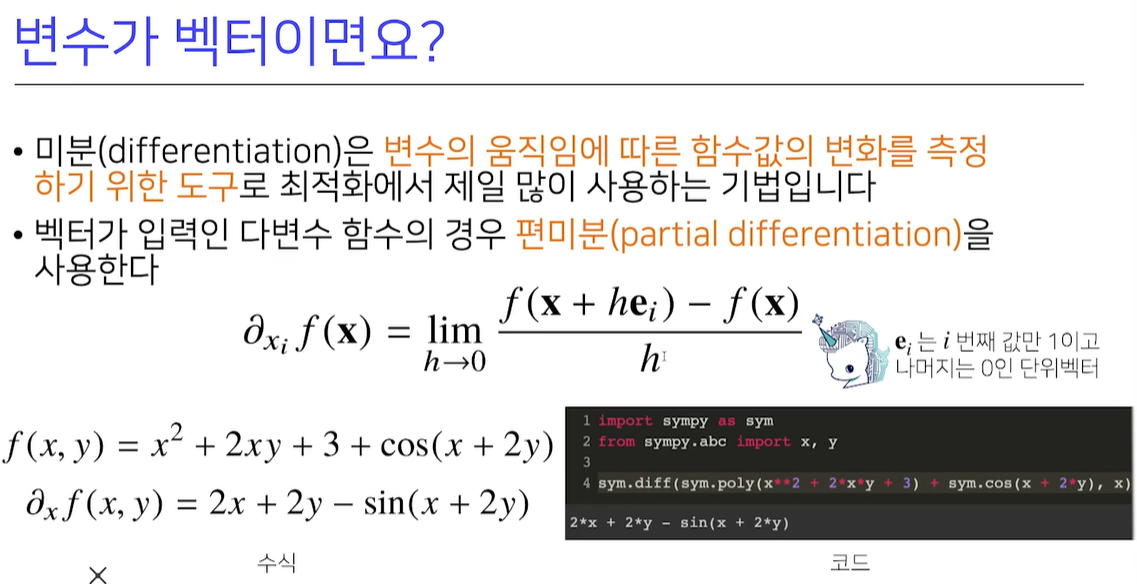

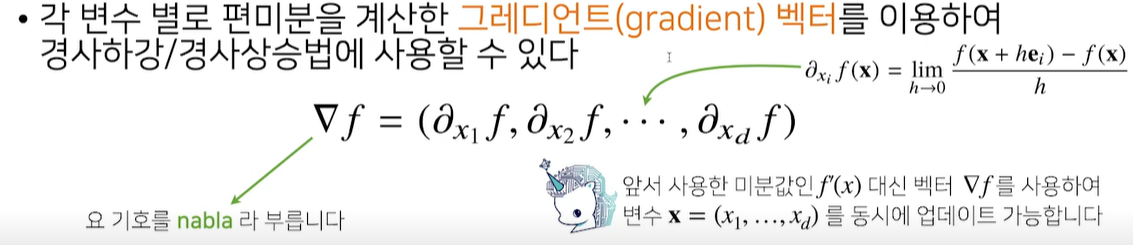

- 그레디언트 벡터가 뭔가요??
    - 마이너스 그레디언트 벡터를 표현하면 극소 방향으로 가는 방향으로 나타내는 벡터

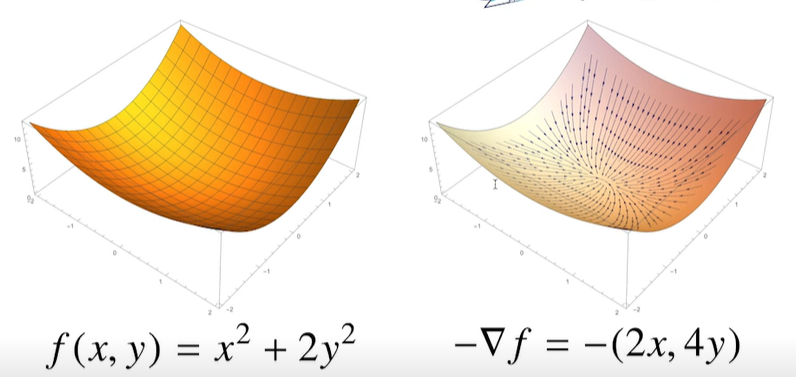

## - 그래디언트 벡터를 경사하강법 알고리즘 적용하면 기존과 차이점?
    - 종료조건을 abs가 아닌 노름으로 비교해야한다

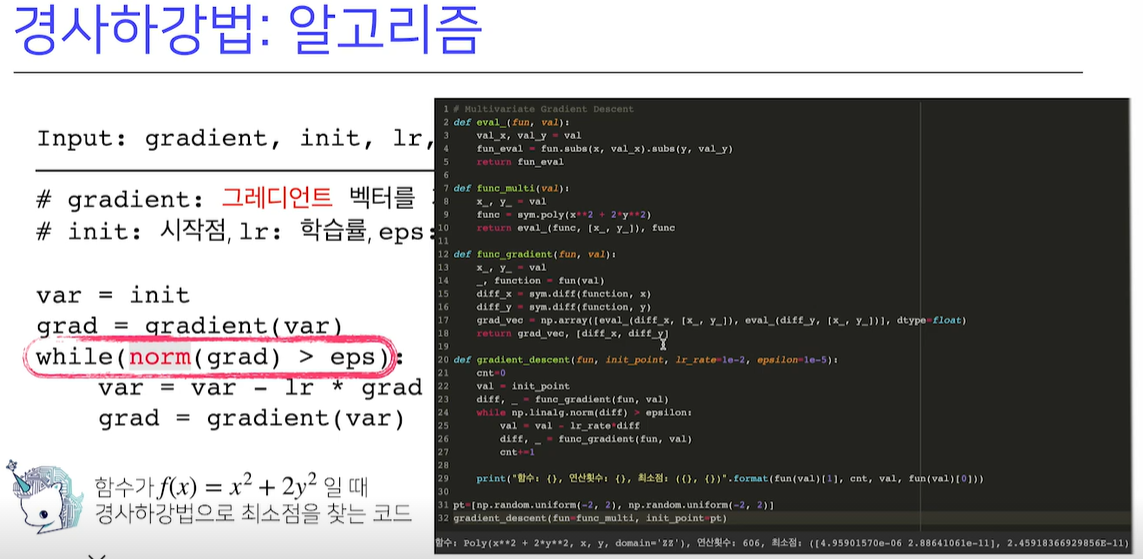

In [65]:
import sympy as sym
from sympy.abc import x
import numpy as np

def eval_(fun, val):
    val_x, val_y = val
    fun_eval = fun.subs(x, val_x).subs(y, val_y)
    return fun_eval

def func_multi(val):
    x_, y_ = val
    func = sym.poly(x**2 + 2*y**2)
    return eval_(func, [x_, y_]), func

def func_gradient(fun, val):
    x_, y_ = val
    _, function = fun(val)
    diff_x = sym.diff(function, x)  #sym.dff 는 미분을 해줌 즉 diff변수에 미분식을 넣어준것
    diff_y = sym.diff(function, y)
    grad_vec = np.array([eval_(diff_x, [x_, y_]), eval_(diff_y, [x_, y_])], dtype = float)
    return grad_vec, [diff_x, diff_y]

def gradient_descent(fun, init_point, lr_rate=1e-2, epsilon=1e-5):
    cnt=0
    val = init_point
    diff, _ = func_gradient(fun, val)
    while np.linalg.norm(diff) > epsilon:
        val = val - lr_rate*diff
        diff, _ = func_gradient(fun, val)
        cnt += 1
    print(f"함수: {fun(val)[1]}, 연산횟수: {cnt}, 최소점: ({val}, {fun(val)[0]})")

pt = [np.random.uniform(-2, 2), np.random.uniform(-2,2)]
gradient_descent(fun=func_multi, init_point=pt)   # np.random.uniform을 최대,최소 사이 균등분할 숫자하나 뽑아줌

함수: Poly(x**2 + 2*y**2, x, y, domain='ZZ'), 연산횟수: 583, 최소점: ([ 4.92132270e-06 -9.22624236e-11], 2.42194171211375E-11)


In [76]:
from sympy import symbols
from sympy.plotting import plot3d
x, y = symbols('x y')
plot3d(x*y, (x, -5, 5), (y, -5, 5))

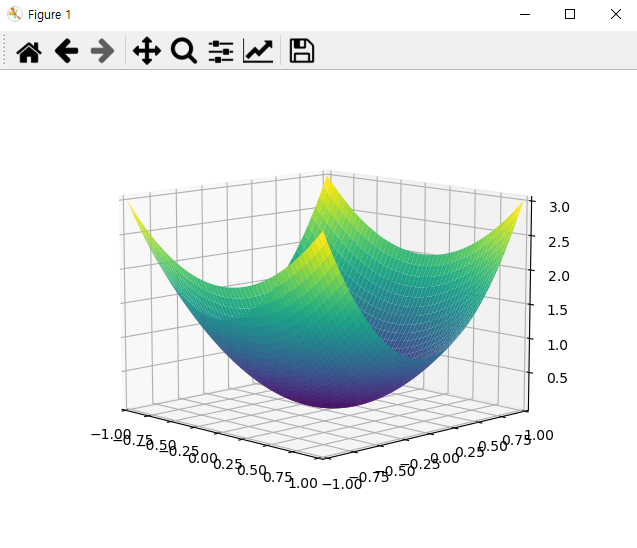